In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymfit 
import corner

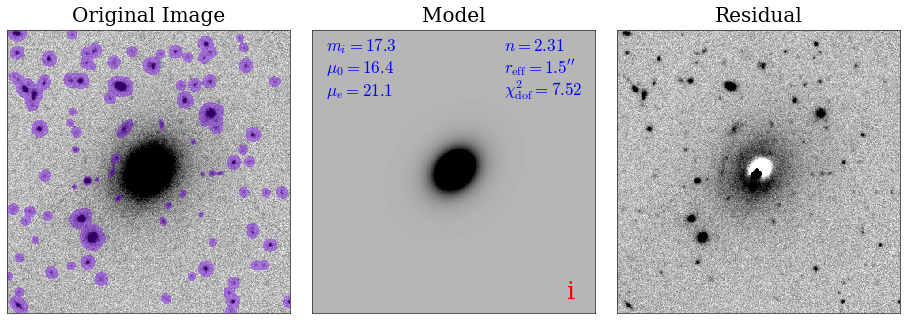

In [8]:
img_fn = '../data/test-galaxy.fits'
init_params = dict(PA=[20, 0, 180])
mask_kws = dict(thresh=1.2, kern_sig=1.0, backsize=10, obj_rmin=1, grow_sig=3.0)
run_kws = dict(bootstrap=1000, bootstrap_fn='boot_out.dat')
sersic = pymfit.tasks.sersic_fit(img_fn, init_params=init_params, 
                                 mask_kws=mask_kws, visualize=True, run_kws=run_kws)

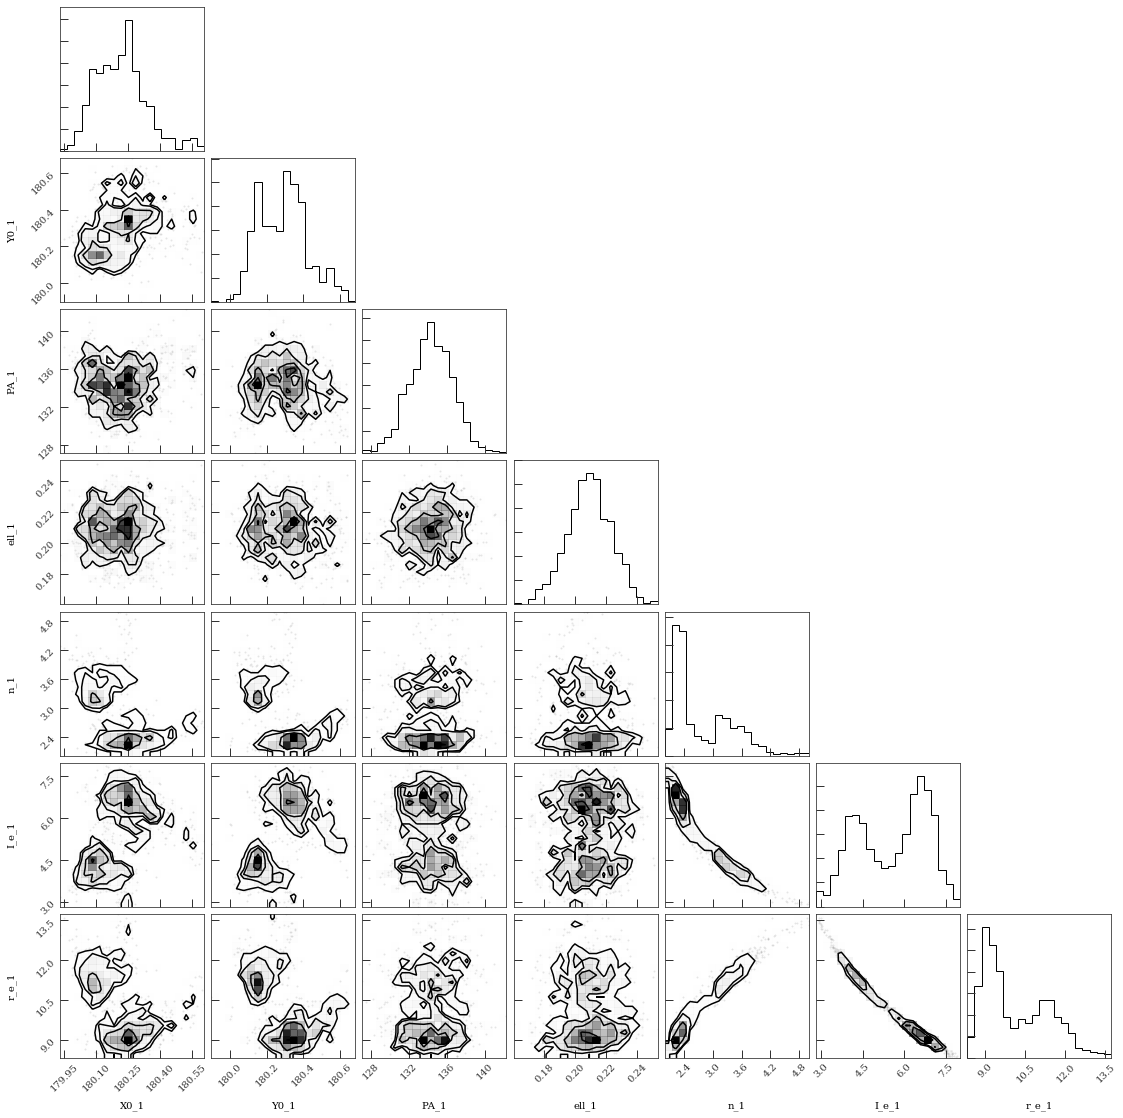

In [9]:
columnNames, bootstrapResults = pymfit.utils.GetBootstrapOutput("boot_out.dat")
corner.corner(bootstrapResults, labels=columnNames);

In [2]:
columnNames, allchains = pymfit.utils.MergeChains('mcmc_out', secondHalf=True)

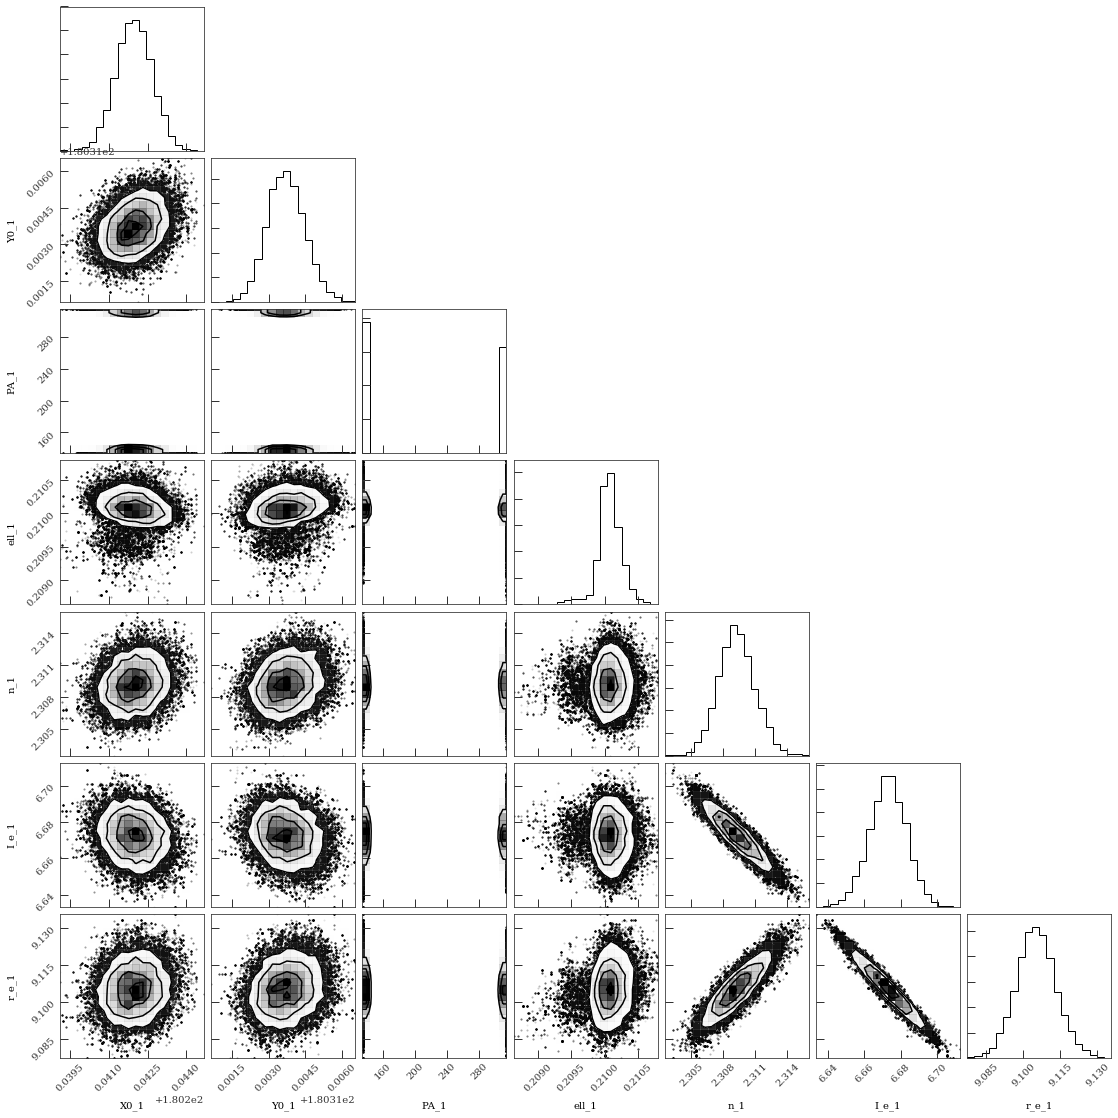

In [5]:
corner.corner(allchains, labels=columnNames);

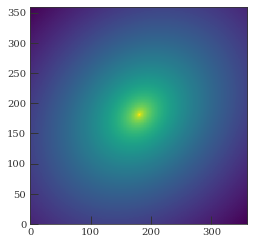

In [5]:
plt.imshow(sersic.array((360, 360), logscale=True), origin='lower');

In [4]:
sersic.params

{'I_e': 6.67222,
 'I_e_err': 0.00859383,
 'PA': 314.318,
 'PA_err': 0.051919,
 'X0': 180.2418,
 'X0_err': 0.0007,
 'Y0': 180.3139,
 'Y0_err': 0.0006,
 'ell': 0.209162,
 'ell_err': 0.000340856,
 'n': 2.30938,
 'n_err': 0.00156022,
 'r_e': 9.10051,
 'r_e_err': 0.00685591,
 'reduced_chisq': 6.758844}